<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter7/skclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.12


# Section 7.8
## Import modules

In [2]:
from numpy import genfromtxt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.metrics import accuracy_score
import sklearn.discriminant_analysis as DA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.neighbors import DistanceMetric
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
print(np.__version__)

1.21.5


## Set random seed

In [3]:
np.random.seed(67890)

## skclass1

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/"
name = "wdbc.data"
data = genfromtxt(url + name,delimiter=',', dtype=str)
y = data[:,1] #responses 
X = data[:,2:].astype('float')#features as an ndarray matrix

X_train , X_test , y_train , y_test = train_test_split(
        X, y, test_size = 0.4, random_state = 1234)

## skclass2

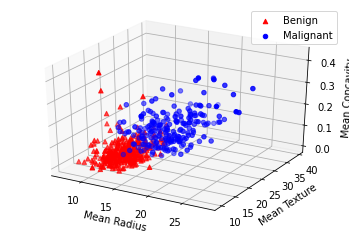

In [5]:
Bidx = np.where(y == 'B')
Midx= np.where(y == 'M')

# plot features Radius (column 0), Texture (1), Concavity (6)
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(X[Bidx,0], X[Bidx,1], X[Bidx,6],
           c='r', marker='^', label='Benign')
ax.scatter(X[Midx,0], X[Midx,1], X[Midx,6],
           c='b', marker='o', label='Malignant')
ax.legend()
ax.set_xlabel('Mean Radius')
ax.set_ylabel('Mean Texture')
ax.set_zlabel('Mean Concavity')
plt.savefig('scatter_bcancer.pdf',format='pdf')
plt.show()

## skclass3

In [6]:
names = ["Logit","NBayes", "LDA", "QDA", "KNN", "SVM"]
#%% 
classifiers = [LogisticRegression(C=1e5),
               GaussianNB(), 
               DA.LinearDiscriminantAnalysis(),
               DA.QuadraticDiscriminantAnalysis(), 
               KNeighborsClassifier(n_neighbors=5),
               SVC(kernel='rbf', gamma = 1e-4)]
             
print('Name  Accuracy\n'+14*'-') 
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test) 
    print('{:6}  {:3.3f}'.format(name, accuracy_score(y_test,y_pred)))

Name  Accuracy
--------------
Logit   0.917
NBayes  0.908
LDA     0.943
QDA     0.956
KNN     0.925
SVM     0.939


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
